VALENTINA ESPITIA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
df = pd.read_csv("datos_whales.csv")

Country: país de procedencia

SeeWhales: haber visto o no ballenas durante el viaje

Age: edad

Gender: género

Education: educación

Income_AUD: grupo de ingreso

Income: Ingreso

AdultWhales: Número de ballenas vistas

YoungWhale: haber visto ballenas jóvenes

Max_wtp: máxima disposición a pagar a la semana por conservar las ballenas

wtp: dispuesto a pagar por protección

####PayConserve: Disposición a pagar por conservar 2 dólares cada semana durante 10 años


In [67]:
df

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [68]:
df.describe

<bound method NDFrame.describe of        Country  SeeWhales   Age  Gender             Education  \
0    Australia          1  31.0  Female               Diploma   
1           UK          0  22.0  Female                Degree   
2          USA          0  46.0  Female                Degree   
3       France          0  37.0  Female               Diploma   
4           UK          0  66.0  Female                Degree   
..         ...        ...   ...     ...                   ...   
696  Australia          0  56.0  Female     Completed year 10   
697  Australia          0  38.0  Female     Completed year 10   
698  Australia          0  24.0  Female               Diploma   
699  Australia          0  50.0    Male  Post-graduate degree   
700  Australia          0  32.0    Male                Degree   

            Income_AUD   Income  AdultWhales YoungWhales  Max_wtp   wtp  \
0    $60,001 - $70,000  65000.5            2         Yes      0.0  Less   
1    Less than $20,000  10000.0    

In [84]:
df = df[["SeeWhales","Income","AdultWhales","PayConserve","Age","YoungWhales"]]

In [76]:
df.replace({"YoungWhales" : {"Yes":1,"No":0}}, inplace=True)

In [90]:
df.dropna(inplace=True)

In [91]:
df

,SeeWhales,Income,AdultWhales,PayConserve,Age,YoungWhales
0,1,65000.5,2,1,31.0,1
1,0,10000.0,6,0,22.0,0
2,0,85000.5,7,0,46.0,0
3,0,25000.5,4,1,37.0,1
5,0,45000.5,3,1,65.0,1
...,...,...,...,...,...,...
696,0,10000.0,0,1,56.0,1
697,0,35000.5,6,1,38.0,1
698,0,25000.5,6,1,24.0,0
699,0,35000.5,2,1,50.0,1


In [78]:
df.describe

<bound method NDFrame.describe of      SeeWhales   Income  AdultWhales  PayConserve   Age  YoungWhales
0            1  65000.5            2            1  31.0            1
1            0  10000.0            6            0  22.0            0
2            0  85000.5            7            0  46.0            0
3            0  25000.5            4            1  37.0            1
4            0      NaN            6            0  66.0            0
..         ...      ...          ...          ...   ...          ...
696          0  10000.0            0            1  56.0            1
697          0  35000.5            6            1  38.0            1
698          0  25000.5            6            1  24.0            0
699          0  35000.5            2            1  50.0            1
700          0  85000.5            8            0  32.0            1

[701 rows x 6 columns]>

In [79]:
df["PayConserve"].value_counts(dropna=False)

1    463
0    238
Name: PayConserve, dtype: int64

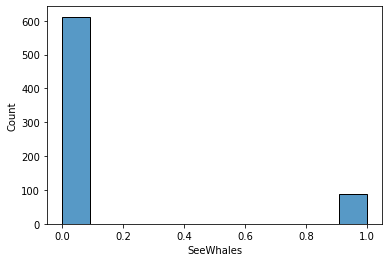

In [80]:
sns.histplot(x=df['SeeWhales'])

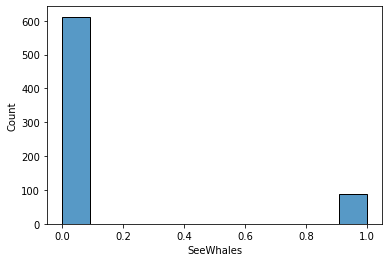

In [81]:
sns.histplot(x=df['SeeWhales'])

In [97]:
x=df.copy()
y=x.pop('PayConserve')
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.026
Date:                Thu, 19 May 2022   Prob (F-statistic):             0.0104
Time:                        22:14:18   Log-Likelihood:                -436.68
No. Observations:                 668   AIC:                             885.4
Df Residuals:                     662   BIC:                             912.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7895      0.073     10.864      0.000       0.647       0.932
SeeWhales       0.1293      0.055      2.364      0.018       0.022       0.237
Income      -5.575e-07   6.99e-07     -0.798      0.425   -1.93e-06    8.15e-07
AdultWhales     0.0060      0.005      1.225      0.221      -0.004       0.015
Age            -0.0037      0.001     -3.109      0.002      -0.006      -0.001
YoungWhales     0.0148      0.042      0.354      0.724      -0.067       0.097
==============================================================================
Omnibus:                     9465.928   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.818
Skew:                          -0.695   Prob(JB):                     1.42e-24
Kurtosis:                       1.582   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
reg.params["Age"]

-0.0037159097672800293

Las personas entre mas jovenes son más estan dispuestas a pagar por la conservacion de las ballenas. Osea disminuye en un 0.3% que las personas de mayor edad quieran pagar por la conservacion de las mismas.

In [100]:
reg.params["SeeWhales"]

0.12928189982095512

Aumentaria un 13% la probabilidad de que las personas que si ven ballenas quieran pagar por su conservacion 

In [102]:
y=df["PayConserve"]
x = df[["Age","SeeWhales"]]
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.541
Date:                Thu, 19 May 2022   Prob (F-statistic):            0.00154
Time:                        22:21:32   Log-Likelihood:                -437.72
No. Observations:                 668   AIC:                             881.4
Df Residuals:                     665   BIC:                             895.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8014      0.053     15.021      0.000       0.697       0.906
Age           -0.0035      0.001     -2.951      0.003      -0.006      -0.001
SeeWhales      0.1341      0.054      2.463      0.014       0.027       0.241
==============================================================================
Omnibus:                     8390.096   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.924
Skew:                          -0.698   Prob(JB):                     8.19e-25
Kurtosis:                       1.572   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
reg.params["Age"]

-0.0034910326442436916

In [104]:
reg.params["SeeWhales"]

0.13405884169521956

Se concluye que la probabilidad de que las personas de mayor edad quieran cuidar las ballenas disminuye en un 0.34%, osea que entre mas jovenes son las personas mas estan dispuestos a pagar por su conservacion.
Ademas en el caso de ver ballenas la probabilidad de que si ven una ballena quieran automaticamente pagar por su conservacion es de un 13.40%